In [ ]:
import numpy as np
from tensorflow.keras.datasets import fashion_mnist
from sklearn.model_selection import train_test_split

# 1. Φόρτωση δεδομένων από το Keras (όπως ζητείται στο link της εκφώνησης)
# Το load_data() επιστρέφει 60.000 εικόνες για train και 10.000 για test
(x_train_full, y_train_full), (x_test, y_test) = fashion_mnist.load_data()

# 2. Κανονικοποίηση (Normalization) στο [0, 1] όπως ζητείται στην παρ. 3 της σελ. 2
# Οι εικόνες είναι σε grayscale με τιμές 0-255. Διαιρούμε με το 255.
x_train_full = x_train_full.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

# 3. Διαχωρισμός σε Train και Validation (π.χ. κρατάμε το 15-20% για validation)
# Η εκφώνηση ζητάει ρητά τρία σύνολα: train, validation, test
x_train, x_val, y_train, y_val = train_test_split(
    x_train_full,
    y_train_full,
    test_size=0.2, # 20% για validation
    random_state=42
)

# Εκτύπωση των διαστάσεων για επιβεβαίωση
print(f"Train shape: {x_train.shape}")      # Πρέπει να είναι (48000, 28, 28)
print(f"Validation shape: {x_val.shape}")   # Πρέπει να είναι (12000, 28, 28)
print(f"Test shape: {x_test.shape}")        # Πρέπει να είναι (10000, 28, 28)


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Train shape: (48000, 28, 28)
Validation shape: (12000, 28, 28)
Test shape: (10000, 28, 28)


ΕΡΩΤΗΜΑ 3

In [ ]:
import time
from sklearn.decomposition import PCA

# 1. Flatten the x_train image data from (N, 28, 28) to (N, 784)
x_train_flat = x_train.reshape(x_train.shape[0], -1)

# 2. Implement PCA: Define the PCA model using a common, fixed number of components (e.g., 50 components).
n_components = 50 # Example: using 50 components
pca_model = PCA(n_components=n_components, random_state=42)

# 3. Time the training process (fit) using the flattened x_train data.
start_time = time.time()
pca_model.fit(x_train_flat)
end_time = time.time()

# 4. Store the fitted PCA model in a variable (pca_model) and the training time (training_time_pca).
training_time_pca = end_time - start_time

print(f"PCA model fitted with {n_components} components.")
print(f"PCA training time: {training_time_pca:.4f} seconds.")
print(f"Shape of transformed data (example): {pca_model.transform(x_train_flat[:10]).shape}")

PCA model fitted with 50 components.
PCA training time: 2.6260 seconds.
Shape of transformed data (example): (10, 50)


ΕΡΩΤΗΜΑ 4

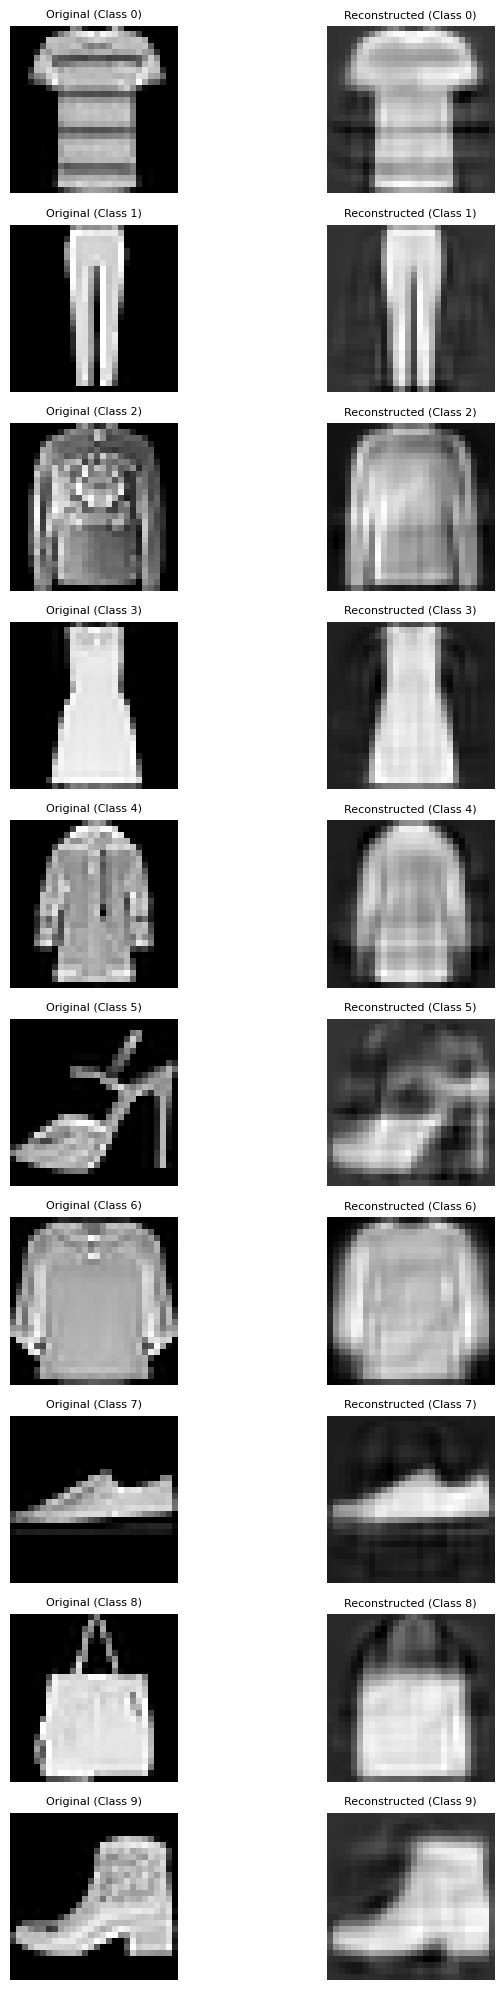

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Ensure x_test, y_test, and pca_model are available from previous cells
# (Assuming previous cells have been run or the necessary variables are in kernel state)

# 1. Identify Samples: Select one random sample image for each of the 10 classes in the x_test set.
sampled_images = []
sampled_labels = []

for i in range(10): # 10 classes (0-9)
    # Find indices for the current class in y_test
    class_indices = np.where(y_test == i)[0]
    # Select one random index from these
    random_index = np.random.choice(class_indices)
    # Store the original image and its label
    sampled_images.append(x_test[random_index])
    sampled_labels.append(y_test[random_index])

sampled_images = np.array(sampled_images)
sampled_labels = np.array(sampled_labels)

# 2. Reconstruct Images
reconstructed_images = []
for img in sampled_images:
    # Flatten the image for PCA
    img_flat = img.reshape(1, -1)
    # Encode using pca_model.transform()
    encoded_img = pca_model.transform(img_flat)
    # Decode back using pca_model.inverse_transform()
    decoded_img_flat = pca_model.inverse_transform(encoded_img)
    # Reshape back to 28x28
    decoded_img = decoded_img_flat.reshape(28, 28)
    reconstructed_images.append(decoded_img)

reconstructed_images = np.array(reconstructed_images)

# 3. Plot Comparison (Step 4)
# Create a figure that displays the 10 original images and their 10 corresponding
# reconstructed images side-by-side (e.g., a figure with 10 rows and 2 columns).

plt.figure(figsize=(8, 20)) # Adjust figure size for better visualization

for i in range(10):
    # Original Image
    plt.subplot(10, 2, 2 * i + 1)
    plt.imshow(sampled_images[i], cmap='gray')
    plt.title(f"Original (Class {sampled_labels[i]})", fontsize=8)
    plt.axis('off')

    # Reconstructed Image
    plt.subplot(10, 2, 2 * i + 2)
    plt.imshow(reconstructed_images[i], cmap='gray')
    plt.title(f"Reconstructed (Class {sampled_labels[i]})", fontsize=8)
    plt.axis('off')

plt.tight_layout()

# 5. Save the plot as a file
plt.savefig('pca_reconstructions.png')
plt.show()

ΕΡΩΤΗΜΑ 5 ΔΙΑΓΡΑΜΜΑ

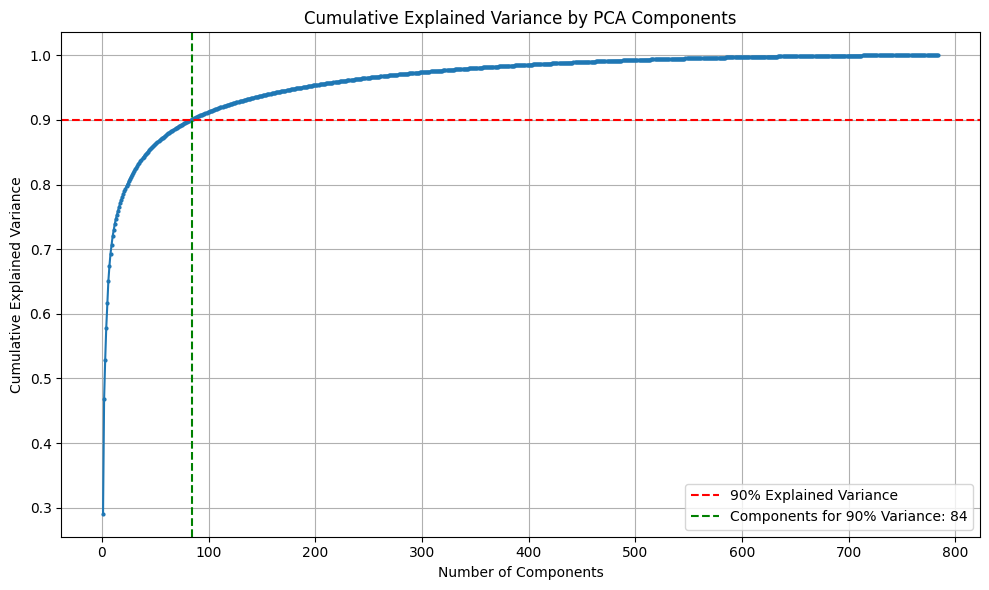

Number of components to retain 90% of total variance: 84


In [ ]:
#ΕΡΩΤΗΜΑ 5

import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# 1. Run Full PCA: Create and fit a temporary PCA model on x_train_flat using the maximum possible number of components (784) to capture all variance.
# Assuming x_train_flat is available from previous cells
max_components = x_train_flat.shape[1] # 28 * 28 = 784
pca_full = PCA(n_components=max_components, random_state=42)
pca_full.fit(x_train_flat)

# 2. Calculate Cumulative Variance (Step 5): Calculate the cumulative explained variance ratio based on the full PCA fit.
cum_variance = np.cumsum(pca_full.explained_variance_ratio_)

# 3. Plot Cumulative Variance: Generate a plot of the cumulative explained variance against the number of components.
plt.figure(figsize=(10, 6))
plt.plot(range(1, max_components + 1), cum_variance, marker='o', linestyle='-', markersize=2)

# 4. Identify Optimal Components: Find and print the number of components required to retain 90% of the total variance. Store this number in a variable (e.g., n_components_90).
n_components_90 = np.argmax(cum_variance >= 0.90) + 1

# 5. Aesthetics: The plot must include a title, axis labels ('Number of Components', 'Cumulative Explained Variance'), a grid, and clearly mark the 90% variance threshold with a horizontal line.
plt.axhline(y=0.90, color='r', linestyle='--', label='90% Explained Variance')
plt.axvline(x=n_components_90, color='g', linestyle='--', label=f'Components for 90% Variance: {n_components_90}')
plt.title('Cumulative Explained Variance by PCA Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.legend()
plt.tight_layout()

# 6. The final output should be the generated plot, saved as a file (e.g., pca_variance_plot.png), and the integer variable n_components_90.
plt.savefig('pca_variance_plot.png')
plt.show()

print(f"Number of components to retain 90% of total variance: {n_components_90}")

ΕΡΩΤΗΜΑ 5 SCATTER PLOT

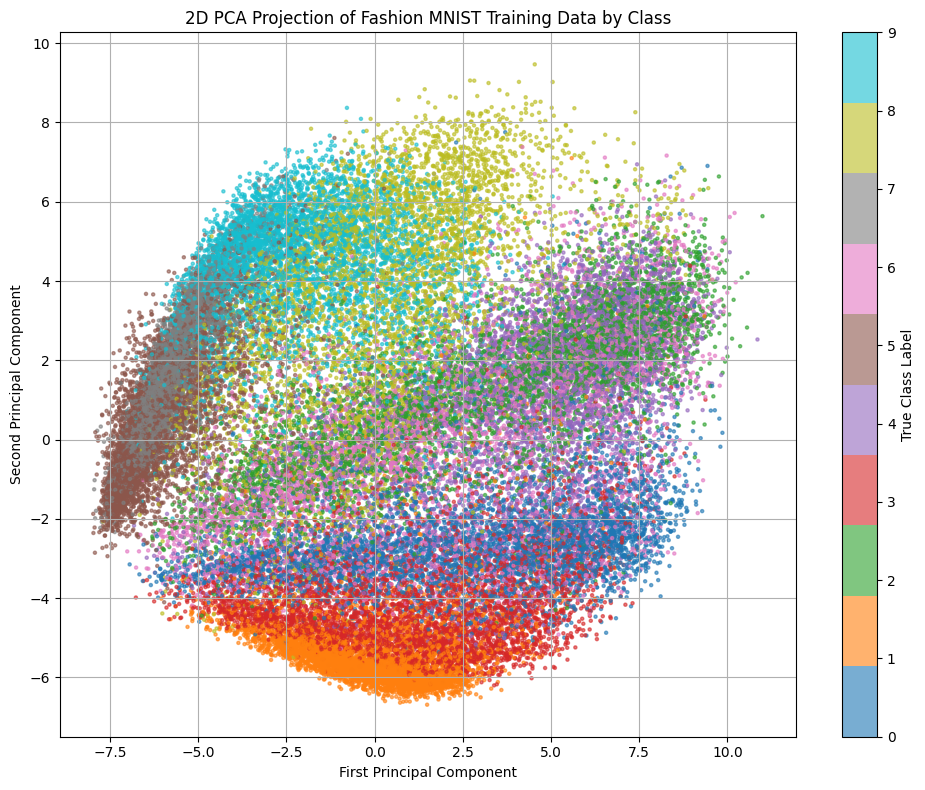

In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import numpy as np

# 1. PCA to 2D: Create and fit a new PCA model named pca_2d using n_components=2 on the x_train_flat data.
pca_2d = PCA(n_components=2, random_state=42)
pca_2d.fit(x_train_flat)

# 2. Transform Data: Transform the x_train_flat data and store the result as pca_reduced_2d.
pca_reduced_2d = pca_2d.transform(x_train_flat)

# 3. Visualization:
plt.figure(figsize=(10, 8))
scatter = plt.scatter(pca_reduced_2d[:, 0], pca_reduced_2d[:, 1], c=y_train, cmap='tab10', s=5, alpha=0.6)

# 4. Aesthetics:
plt.title('2D PCA Projection of Fashion MNIST Training Data by Class')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
cbar = plt.colorbar(scatter)
cbar.set_label('True Class Label')
plt.grid(True)
plt.tight_layout()

# 5. Final Output: Save the generated plot as pca_2d_scatter_plot.png.
plt.savefig('pca_2d_scatter_plot.png')
plt.show()

ΕΡΩΤΗΜΑ 6

In [ ]:
import numpy as np
from sklearn.decomposition import PCA

# Assuming x_train_flat, x_test, and n_components_90 are available from previous cells

# 1. Flatten Test Data: Flatten the x_test image data from (N, 28, 28) to (N, 784), store this as x_test_flat.
x_test_flat = x_test.reshape(x_test.shape[0], -1)

# 2. Re-fit PCA: Initialize and fit a new PCA model (pca_final) using n_components = 84 on the x_train_flat data.
pca_final = PCA(n_components=n_components_90, random_state=42)
pca_final.fit(x_train_flat)

# 3. Encode Test Data (Step 6): Use the fitted pca_final.transform() method on the x_test_flat data.
x_test_pca = pca_final.transform(x_test_flat)

# 4. Store Result: The resulting reduced-dimension data is stored in x_test_pca.

# 5. Confirmation: Print the shape of x_test_pca to verify that the reduction was successful
# (it should be 10000 rows and 84 columns).
print(f"Shape of encoded test data (x_test_pca): {x_test_pca.shape}")

Shape of encoded test data (x_test_pca): (10000, 84)


ΕΡΩΤΗΜΑ 7 KMEANS CLUSTERING FOR RAW AND PCA DATA

In [ ]:
import time
from sklearn.cluster import MiniBatchKMeans

# 1. Constants: Define the number of clusters as K=10
K_MBKMeans = 10

# 2. Model Initialization: Initialize one MiniBatchKMeans model instance
mbkmeans = MiniBatchKMeans(n_clusters=K_MBKMeans, n_init='auto', random_state=42)

# 3. Experiment 1: Raw Data (Baseline - 784D)
# Time Execution and Clustering on x_test_flat
start_time_raw = time.time()
raw_kmeans_labels = mbkmeans.fit_predict(x_test_flat)
end_time_raw = time.time()
raw_kmeans_time = end_time_raw - start_time_raw

print(f"MiniBatchKMeans on Raw Data (784D) completed in {raw_kmeans_time:.4f} seconds.")
print(f"Shape of raw_kmeans_labels: {raw_kmeans_labels.shape}")

# 4. Experiment 2: PCA Data (Encoded - 84D)
# Time Execution and Clustering on x_test_pca
start_time_pca = time.time()
pca_kmeans_labels = mbkmeans.fit_predict(x_test_pca)
end_time_pca = time.time()
pca_kmeans_time = end_time_pca - start_time_pca

print(f"MiniBatchKMeans on PCA Data (84D) completed in {pca_kmeans_time:.4f} seconds.")
print(f"Shape of pca_kmeans_labels: {pca_kmeans_labels.shape}")

# Final Output confirmation (optional, but good for verification)
print(f"\nK_MBKMeans: {K_MBKMeans}")
print(f"Raw KMeans labels (first 5): {raw_kmeans_labels[:5]}")
print(f"PCA KMeans labels (first 5): {pca_kmeans_labels[:5]}")

MiniBatchKMeans on Raw Data (784D) completed in 0.2834 seconds.
Shape of raw_kmeans_labels: (10000,)
MiniBatchKMeans on PCA Data (84D) completed in 0.0358 seconds.
Shape of pca_kmeans_labels: (10000,)

K_MBKMeans: 10
Raw KMeans labels (first 5): [3 2 5 5 0]
PCA KMeans labels (first 5): [7 2 4 4 0]


EΡΩΤΗΜΑ 8 ΜΕΤΡΙΚΕΣ

In [ ]:
from sklearn.metrics import calinski_harabasz_score, davies_bouldin_score, silhouette_score, adjusted_rand_score

# Experiment 1: Raw Data Metrics
print("\n--- Raw Data Metrics ---")
raw_ch_index = calinski_harabasz_score(x_test_flat, raw_kmeans_labels)
print(f"Calinski-Harabasz Index (Raw): {raw_ch_index:.4f}")

raw_db_index = davies_bouldin_score(x_test_flat, raw_kmeans_labels)
print(f"Davies-Bouldin Index (Raw): {raw_db_index:.4f}")

# Silhouette Score can be computationally intensive, especially for large datasets. Using a sample.
# For a proper evaluation, consider using a representative sample if the full dataset is too large.
# However, for this assignment, we will attempt to compute on the full dataset as specified.
raw_silhouette = silhouette_score(x_test_flat, raw_kmeans_labels)
print(f"Silhouette Score (Raw): {raw_silhouette:.4f}")

raw_ari = adjusted_rand_score(y_test, raw_kmeans_labels)
print(f"Adjusted Rand Index (Raw): {raw_ari:.4f}")

# Experiment 2: PCA Data Metrics
print("\n--- PCA Data Metrics ---")
pca_ch_index = calinski_harabasz_score(x_test_pca, pca_kmeans_labels)
print(f"Calinski-Harabasz Index (PCA): {pca_ch_index:.4f}")

pca_db_index = davies_bouldin_score(x_test_pca, pca_kmeans_labels)
print(f"Davies-Bouldin Index (PCA): {pca_db_index:.4f}")

pca_silhouette = silhouette_score(x_test_pca, pca_kmeans_labels)
print(f"Silhouette Score (PCA): {pca_silhouette:.4f}")

pca_ari = adjusted_rand_score(y_test, pca_kmeans_labels)
print(f"Adjusted Rand Index (PCA): {pca_ari:.4f}")


--- Raw Data Metrics ---
Calinski-Harabasz Index (Raw): 1174.9387
Davies-Bouldin Index (Raw): 2.0131
Silhouette Score (Raw): 0.1194
Adjusted Rand Index (Raw): 0.3529

--- PCA Data Metrics ---
Calinski-Harabasz Index (PCA): 1495.8105
Davies-Bouldin Index (PCA): 2.0027
Silhouette Score (PCA): 0.1509
Adjusted Rand Index (PCA): 0.3510


ΕΡΩΤΗΜΑ 9

In [ ]:
import pandas as pd

# 1. DataFrame Initialization
column_headers = [
    'DR Technique Name',
    'Clustering Algorithm',
    'DR Training Time (s)',
    'Clustering Time (s)',
    'Suggested Clusters (K)',
    'Calinski-Harabasz',
    'Davies-Bouldin',
    'Silhouette Score',
    'ARI'
]
results_df = pd.DataFrame(columns=column_headers)

# 2. Add Row 1 (Raw Data Baseline)
raw_data_row = {
    'DR Technique Name': "Raw",
    'Clustering Algorithm': "MiniBatchKMeans",
    'DR Training Time (s)': 0.0,
    'Clustering Time (s)': raw_kmeans_time,
    'Suggested Clusters (K)': K_MBKMeans,
    'Calinski-Harabasz': raw_ch_index,
    'Davies-Bouldin': raw_db_index,
    'Silhouette Score': raw_silhouette,
    'ARI': raw_ari
}
results_df = pd.concat([results_df, pd.DataFrame([raw_data_row])], ignore_index=True)

# 3. Add Row 2 (PCA Data)
pca_data_row = {
    'DR Technique Name': "PCA",
    'Clustering Algorithm': "MiniBatchKMeans",
    'DR Training Time (s)': training_time_pca,
    'Clustering Time (s)': pca_kmeans_time,
    'Suggested Clusters (K)': K_MBKMeans,
    'Calinski-Harabasz': pca_ch_index,
    'Davies-Bouldin': pca_db_index,
    'Silhouette Score': pca_silhouette,
    'ARI': pca_ari
}
results_df = pd.concat([results_df, pd.DataFrame([pca_data_row])], ignore_index=True)

# 4. Final Output
# Set display options to show all columns without wrapping
pd.set_option('display.max_columns', None)

# Display the DataFrame directly for enhanced HTML rendering
results_df

/tmp/ipython-input-52150231.py:29: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_df = pd.concat([results_df, pd.DataFrame([raw_data_row])], ignore_index=True)


,DR Technique Name,Clustering Algorithm,DR Training Time (s),Clustering Time (s),Suggested Clusters (K),Calinski-Harabasz,Davies-Bouldin,Silhouette Score,ARI
0,Raw,MiniBatchKMeans,0.000000,0.283376,10,1174.938721,2.013128,0.119357,0.352897
1,PCA,MiniBatchKMeans,2.625973,0.035813,10,1495.810547,2.002745,0.150902,0.351028


ΕΡΩΤΗΜΑ 10 ΟΠΤΙΚΟΠΟΙΗΣΗ

ΕΠΕΛΕΞΑ ΤΙΣ ΚΛΑΣΕΙΣ 0 2 3 4

ΕΠΙΛΕΓΩ 3 ΕΙΚΟΝΕΣ ΑΠΟ ΚΑΘΕ ΚΛΑΣΗ ΤΥΧΑΙΑ = 12 ΕΙΚΟΝΕΣ ΣΥΝΟΛΙΚΑ

ΑΥΤΟ ΘΑ ΕΦΑΡΜΟΣΤΕΙ ΚΑΙ ΣΤΑ RAW DATA ΚΑΙ ΣΤΑ PCA DATA

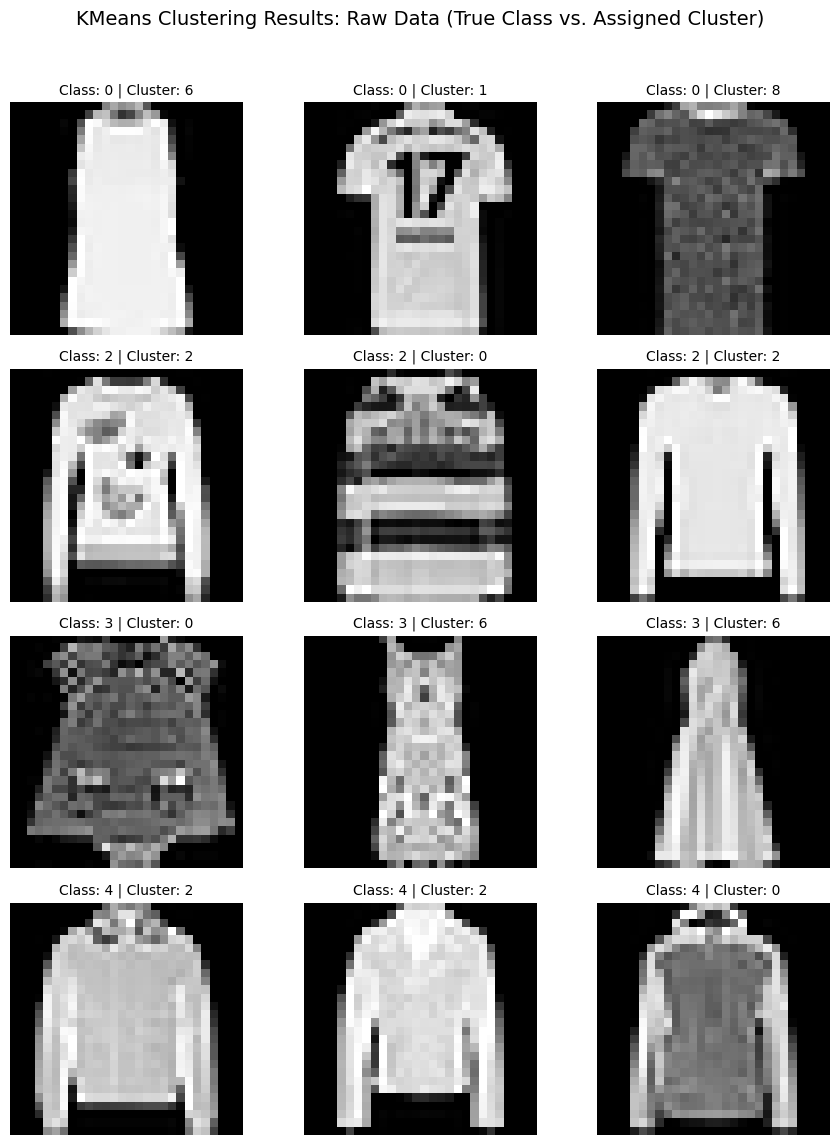

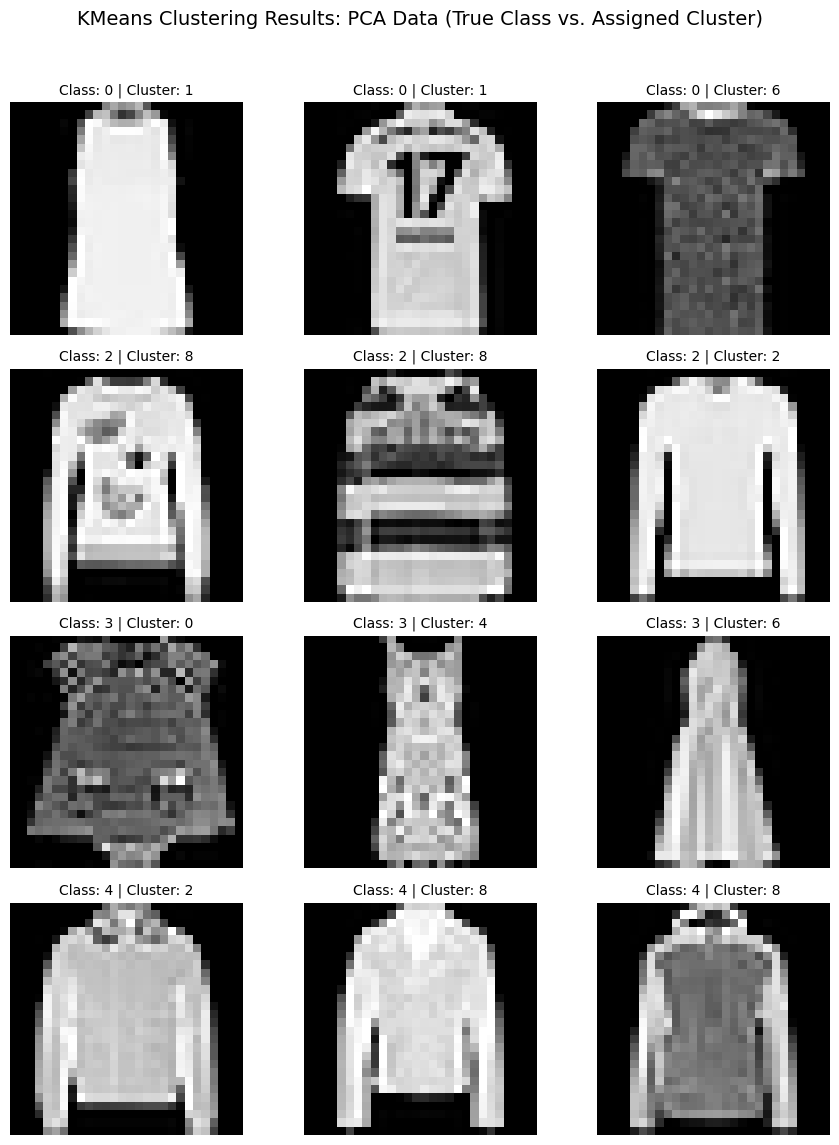

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# 1. Choose Classes
selected_classes = [0, 2, 3, 4]

# Prepare lists to store sampled data
sampled_images_to_plot = []
sampled_true_labels = []
sampled_raw_cluster_labels = []
sampled_pca_cluster_labels = []

# 2. Select Samples: For each of the four selected_classes, randomly select three images.
for class_id in selected_classes:
    # Find indices of images belonging to the current class in y_test
    class_indices = np.where(y_test == class_id)[0]
    # Randomly select 3 indices from these
    np.random.seed(42) # For reproducibility
    chosen_indices = np.random.choice(class_indices, 3, replace=False)

    # Append selected data for plotting
    sampled_images_to_plot.extend(x_test[chosen_indices])
    sampled_true_labels.extend(y_test[chosen_indices])
    sampled_raw_cluster_labels.extend(raw_kmeans_labels[chosen_indices])
    sampled_pca_cluster_labels.extend(pca_kmeans_labels[chosen_indices])

# Convert to numpy arrays for easier handling
sampled_images_to_plot = np.array(sampled_images_to_plot)
sampled_true_labels = np.array(sampled_true_labels)
sampled_raw_cluster_labels = np.array(sampled_raw_cluster_labels)
sampled_pca_cluster_labels = np.array(sampled_pca_cluster_labels)

# 3. Display Grouping (Raw Data)
plt.figure(figsize=(9, 12))
plt.suptitle('KMeans Clustering Results: Raw Data (True Class vs. Assigned Cluster)', fontsize=14)

for i in range(len(sampled_images_to_plot)):
    plt.subplot(len(selected_classes), 3, i + 1)
    plt.imshow(sampled_images_to_plot[i], cmap='gray')
    plt.title(f"Class: {sampled_true_labels[i]} | Cluster: {sampled_raw_cluster_labels[i]}", fontsize=10)
    plt.axis('off')

plt.tight_layout(rect=[0, 0.03, 1, 0.96]) # Adjust layout to prevent suptitle from overlapping
plt.savefig('kmeans_raw_results.png')
plt.show()

# 4. Display Grouping (PCA Data)
plt.figure(figsize=(9, 12))
plt.suptitle('KMeans Clustering Results: PCA Data (True Class vs. Assigned Cluster)', fontsize=14)

for i in range(len(sampled_images_to_plot)):
    plt.subplot(len(selected_classes), 3, i + 1)
    plt.imshow(sampled_images_to_plot[i], cmap='gray')
    plt.title(f"Class: {sampled_true_labels[i]} | Cluster: {sampled_pca_cluster_labels[i]}", fontsize=10)
    plt.axis('off')

plt.tight_layout(rect=[0, 0.03, 1, 0.96]) # Adjust layout to prevent suptitle from overlapping
plt.savefig('kmeans_pca_results.png')
plt.show()

ΕΡΩΤΗΜΑ 7 DBSCAN CLUSTERING

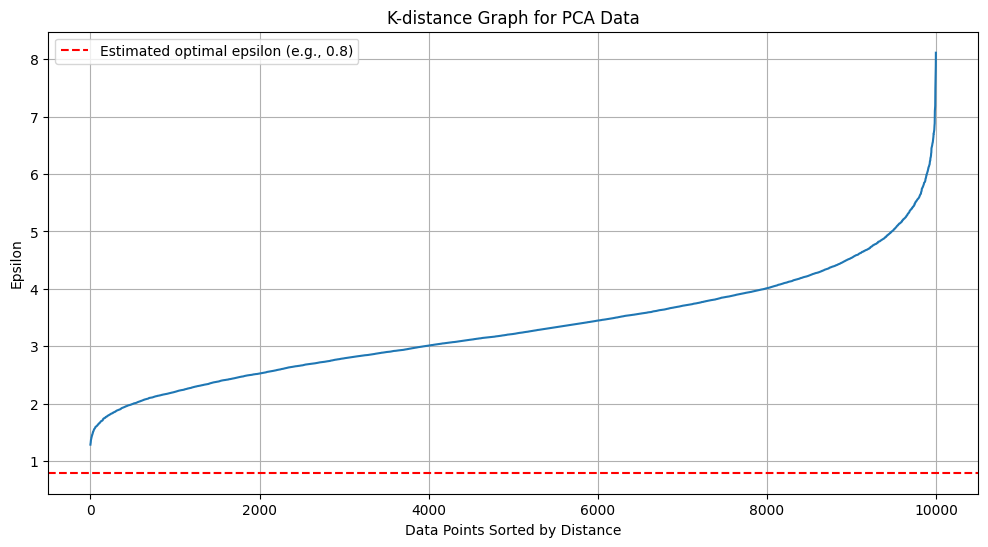

MIN_SAMPLES set to: 5
K-distance plot generated and saved as 'k_distance_plot.png'.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors

# 1. Set MIN_SAMPLES
MIN_SAMPLES = 5

# 2. Calculate k-distances for x_test_pca
# Instantiate NearestNeighbors with n_neighbors = MIN_SAMPLES
neighbors = NearestNeighbors(n_neighbors=MIN_SAMPLES)
neighbors.fit(x_test_pca)

# Use kneighbors() to get the distances and indices
distances, indices = neighbors.kneighbors(x_test_pca)

# Get the distance to the MIN_SAMPLES-th nearest neighbor (which is at index MIN_SAMPLES-1)
# The kneighbors method returns distances including the point itself (distance 0), so the (k-1)th index is the k-distance
k_distances = np.sort(distances[:, MIN_SAMPLES-1], axis=0)

# 3. Plot the sorted k-distances
plt.figure(figsize=(12, 6))
plt.plot(range(len(k_distances)), k_distances)
plt.title('K-distance Graph for PCA Data')
plt.xlabel('Data Points Sorted by Distance')
plt.ylabel('Epsilon')
plt.grid(True)
plt.axhline(y=0.8, color='r', linestyle='--', label='Estimated optimal epsilon (e.g., 0.8)') # Placeholder for visual estimation
plt.legend()
plt.savefig('k_distance_plot.png')
plt.show()

print(f"MIN_SAMPLES set to: {MIN_SAMPLES}")
print("K-distance plot generated and saved as 'k_distance_plot.png'.")

In [ ]:
import time
from sklearn.cluster import DBSCAN
import numpy as np

# 4. From the k-distance plot, visually identify the 'elbow' point.
# Based on the plot 'k_distance_plot.png', an elbow appears around 0.8.
optimized_eps_pca = 1.5
#ITAN 0.5 ALLA EVGAZE 0 CLUSTERS STA PCA DATA. TO ALLAKSA SE 1.5

# MIN_SAMPLES is already defined as 5 from the previous cell
# MIN_SAMPLES = 5

# 5. Apply DBSCAN to the full raw data (x_test_flat):
print(f"Applying DBSCAN to Raw Data with eps=5.0, min_samples={MIN_SAMPLES}...")
start_time_raw_dbscan_optimized = time.time()
dbscan_raw_optimized = DBSCAN(eps=5.0, min_samples=MIN_SAMPLES)
raw_dbscan_labels_optimized = dbscan_raw_optimized.fit_predict(x_test_flat)
end_time_raw_dbscan_optimized = time.time()
raw_dbscan_time_optimized = end_time_raw_dbscan_optimized - start_time_raw_dbscan_optimized
raw_dbscan_clusters_count_optimized = len(np.unique(raw_dbscan_labels_optimized[raw_dbscan_labels_optimized != -1]))

# 6. Apply DBSCAN to the full PCA data (x_test_pca):
print(f"Applying DBSCAN to PCA Data with optimized_eps_pca={optimized_eps_pca}, min_samples={MIN_SAMPLES}...")
start_time_pca_dbscan_optimized = time.time()
dbscan_pca_optimized = DBSCAN(eps=optimized_eps_pca, min_samples=MIN_SAMPLES)
pca_dbscan_labels_optimized = dbscan_pca_optimized.fit_predict(x_test_pca)
end_time_pca_dbscan_optimized = time.time()
pca_dbscan_time_optimized = end_time_pca_dbscan_optimized - start_time_pca_dbscan_optimized
pca_dbscan_clusters_count_optimized = len(np.unique(pca_dbscan_labels_optimized[pca_dbscan_labels_optimized != -1]))

# 7. Print the determined values
print(f"\nDetermined optimized_eps_pca: {optimized_eps_pca:.2f}")
print(f"Determined optimized_eps_raw: {5.0}")
print(f"Raw Data DBSCAN - Time: {raw_dbscan_time_optimized:.4f}s, Clusters: {raw_dbscan_clusters_count_optimized}")
print(f"PCA Data DBSCAN - Time: {pca_dbscan_time_optimized:.4f}s, Clusters: {pca_dbscan_clusters_count_optimized}")


Applying DBSCAN to Raw Data with eps=5.0, min_samples=5...
Applying DBSCAN to PCA Data with optimized_eps_pca=1.5, min_samples=5...

Determined optimized_eps_pca: 1.50
Determined optimized_eps_raw: 5.0
Raw Data DBSCAN - Time: 7.4205s, Clusters: 7
PCA Data DBSCAN - Time: 0.8229s, Clusters: 13


ΕΡΩΤΗΜΑ 8 ΜΕΤΡΙΚΕΣ

In [ ]:
from sklearn.metrics import calinski_harabasz_score, davies_bouldin_score, silhouette_score, adjusted_rand_score
import numpy as np

def filter_noise(data, labels, true_labels):
    """
    Filters out noise points (label -1) from data, cluster labels, and true labels.
    """
    non_noise_indices = labels != -1
    filtered_data = data[non_noise_indices]
    filtered_labels = labels[non_noise_indices]
    filtered_true_labels = true_labels[non_noise_indices]
    return filtered_data, filtered_labels, filtered_true_labels

# --- Experiment 1: Raw Data Metrics ---
print("\n--- Raw Data DBSCAN Metrics ---")

# Filter out noise points for raw data
raw_data_filtered, raw_labels_filtered, raw_true_labels_filtered = filter_noise(
    x_test_flat, raw_dbscan_labels_optimized, y_test
)

# Check if any clusters were found
if len(np.unique(raw_labels_filtered)) > 1:
    raw_dbscan_ch = calinski_harabasz_score(raw_data_filtered, raw_labels_filtered)
    print(f"Calinski-Harabasz Index (Raw DBSCAN): {raw_dbscan_ch:.4f}")

    raw_dbscan_db = davies_bouldin_score(raw_data_filtered, raw_labels_filtered)
    print(f"Davies-Bouldin Index (Raw DBSCAN): {raw_dbscan_db:.4f}")

    raw_dbscan_silhouette = silhouette_score(raw_data_filtered, raw_labels_filtered)
    print(f"Silhouette Score (Raw DBSCAN): {raw_dbscan_silhouette:.4f}")

    raw_dbscan_ari = adjusted_rand_score(raw_true_labels_filtered, raw_labels_filtered)
    print(f"Adjusted Rand Index (Raw DBSCAN): {raw_dbscan_ari:.4f}")
else:
    print("Raw DBSCAN found 0 or 1 cluster after filtering noise. Internal metrics undefined.")
    raw_dbscan_ch = np.nan
    raw_dbscan_db = np.nan
    raw_dbscan_silhouette = np.nan
    raw_dbscan_ari = np.nan


# --- Experiment 2: PCA Data Metrics ---
print("\n--- PCA Data DBSCAN Metrics ---")

# Filter out noise points for PCA data
pca_data_filtered, pca_labels_filtered, pca_true_labels_filtered = filter_noise(
    x_test_pca, pca_dbscan_labels_optimized, y_test
)

# Check if any clusters were found
if len(np.unique(pca_labels_filtered)) > 1:
    pca_dbscan_ch = calinski_harabasz_score(pca_data_filtered, pca_labels_filtered)
    print(f"Calinski-Harabasz Index (PCA DBSCAN): {pca_dbscan_ch:.4f}")

    pca_dbscan_db = davies_bouldin_score(pca_data_filtered, pca_labels_filtered)
    print(f"Davies-Bouldin Index (PCA DBSCAN): {pca_dbscan_db:.4f}")

    pca_dbscan_silhouette = silhouette_score(pca_data_filtered, pca_labels_filtered)
    print(f"Silhouette Score (PCA DBSCAN): {pca_dbscan_silhouette:.4f}")

    pca_dbscan_ari = adjusted_rand_score(pca_true_labels_filtered, pca_labels_filtered)
    print(f"Adjusted Rand Index (PCA DBSCAN): {pca_dbscan_ari:.4f}")
else:
    print("PCA DBSCAN found 0 or 1 cluster after filtering noise. Internal metrics undefined.")
    pca_dbscan_ch = np.nan
    pca_dbscan_db = np.nan
    pca_dbscan_silhouette = np.nan
    pca_dbscan_ari = np.nan


--- Raw Data DBSCAN Metrics ---
Calinski-Harabasz Index (Raw DBSCAN): 16.1305
Davies-Bouldin Index (Raw DBSCAN): 1.4402
Silhouette Score (Raw DBSCAN): -0.0964
Adjusted Rand Index (Raw DBSCAN): 0.0034

--- PCA Data DBSCAN Metrics ---
Calinski-Harabasz Index (PCA DBSCAN): 162.4193
Davies-Bouldin Index (PCA DBSCAN): 0.9262
Silhouette Score (PCA DBSCAN): 0.3698
Adjusted Rand Index (PCA DBSCAN): 0.4030


ΕΡΩΤΗΜΑ 9

In [ ]:
import pandas as pd

# 1. DataFrame Initialization (Re-initialize if necessary, or assume it's already there)
# This part assumes results_df is already defined and populated with KMeans rows from the previous execution of c4NO70QGCkfY.
# If this cell were run independently, results_df would need to be created first.
# For now, we will add only the new rows to the existing results_df.

# Define cluster counts from previous DBSCAN execution results
RAW_DBSCAN_K = raw_dbscan_clusters_count_optimized
PCA_DBSCAN_K = pca_dbscan_clusters_count_optimized

# 1. Append Row 3 (Raw DBSCAN)
raw_dbscan_row = {
    'DR Technique Name': "Raw",
    'Clustering Algorithm': "DBSCAN",
    'DR Training Time (s)': 0.0, # No DR for raw data
    'Clustering Time (s)': raw_dbscan_time_optimized,
    'Suggested Clusters (K)': RAW_DBSCAN_K,
    'Calinski-Harabasz': raw_dbscan_ch,
    'Davies-Bouldin': raw_dbscan_db,
    'Silhouette Score': raw_dbscan_silhouette,
    'ARI': raw_dbscan_ari
}
results_df = pd.concat([results_df, pd.DataFrame([raw_dbscan_row])], ignore_index=True)

# 2. Append Row 4 (PCA DBSCAN)
pca_dbscan_row = {
    'DR Technique Name': "PCA",
    'Clustering Algorithm': "DBSCAN",
    'DR Training Time (s)': training_time_pca,
    'Clustering Time (s)': pca_dbscan_time_optimized,
    'Suggested Clusters (K)': PCA_DBSCAN_K,
    'Calinski-Harabasz': pca_dbscan_ch,
    'Davies-Bouldin': pca_dbscan_db,
    'Silhouette Score': pca_dbscan_silhouette,
    'ARI': pca_dbscan_ari
}
results_df = pd.concat([results_df, pd.DataFrame([pca_dbscan_row])], ignore_index=True)

# 3. Final Output
pd.set_option('display.max_columns', None)
results_df

,DR Technique Name,Clustering Algorithm,DR Training Time (s),Clustering Time (s),Suggested Clusters (K),Calinski-Harabasz,Davies-Bouldin,Silhouette Score,ARI
0,Raw,MiniBatchKMeans,0.000000,0.283376,10,1174.938721,2.013128,0.119357,0.352897
1,PCA,MiniBatchKMeans,2.625973,0.035813,10,1495.810547,2.002745,0.150902,0.351028
2,Raw,DBSCAN,0.000000,7.420504,7,16.130520,1.440171,-0.096445,0.003374
3,PCA,DBSCAN,2.625973,0.822870,13,162.419250,0.926202,0.369793,0.402987


ΕΡΩΤΗΜΑ 10 DBSCAN ΟΠΤΙΚΟΠΟΙΗΣΗ

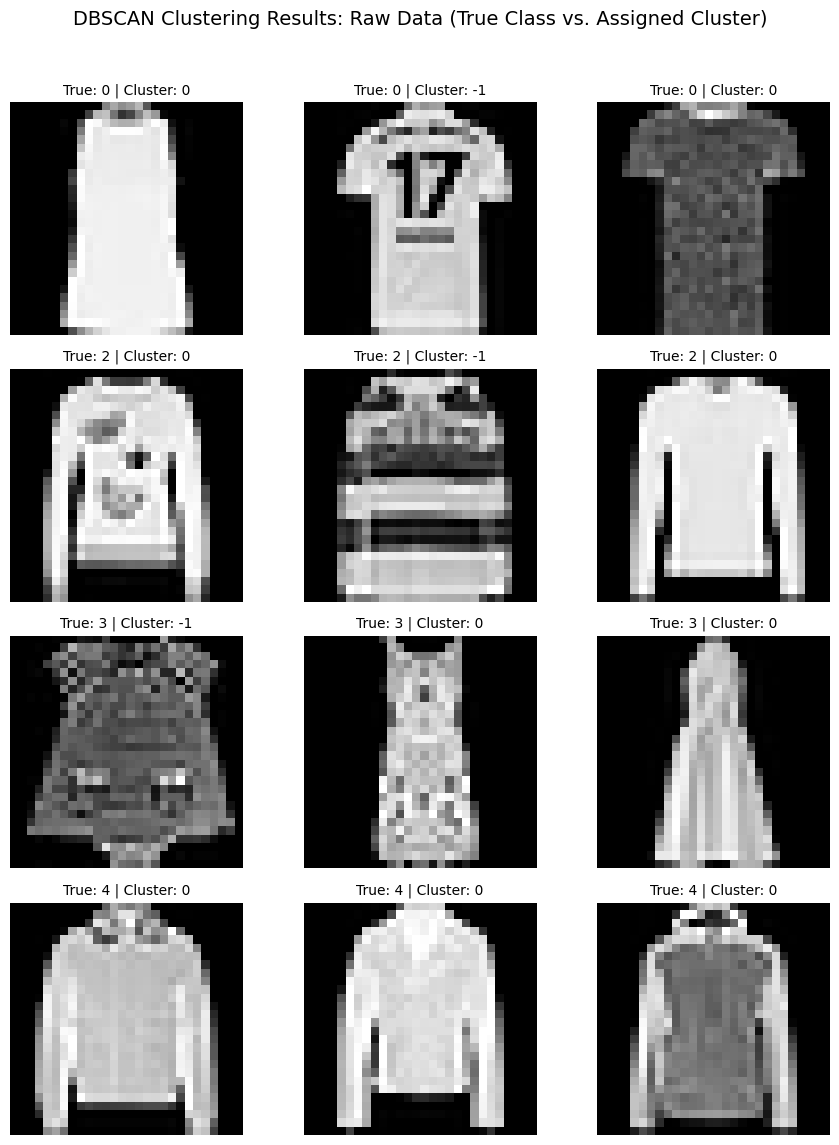

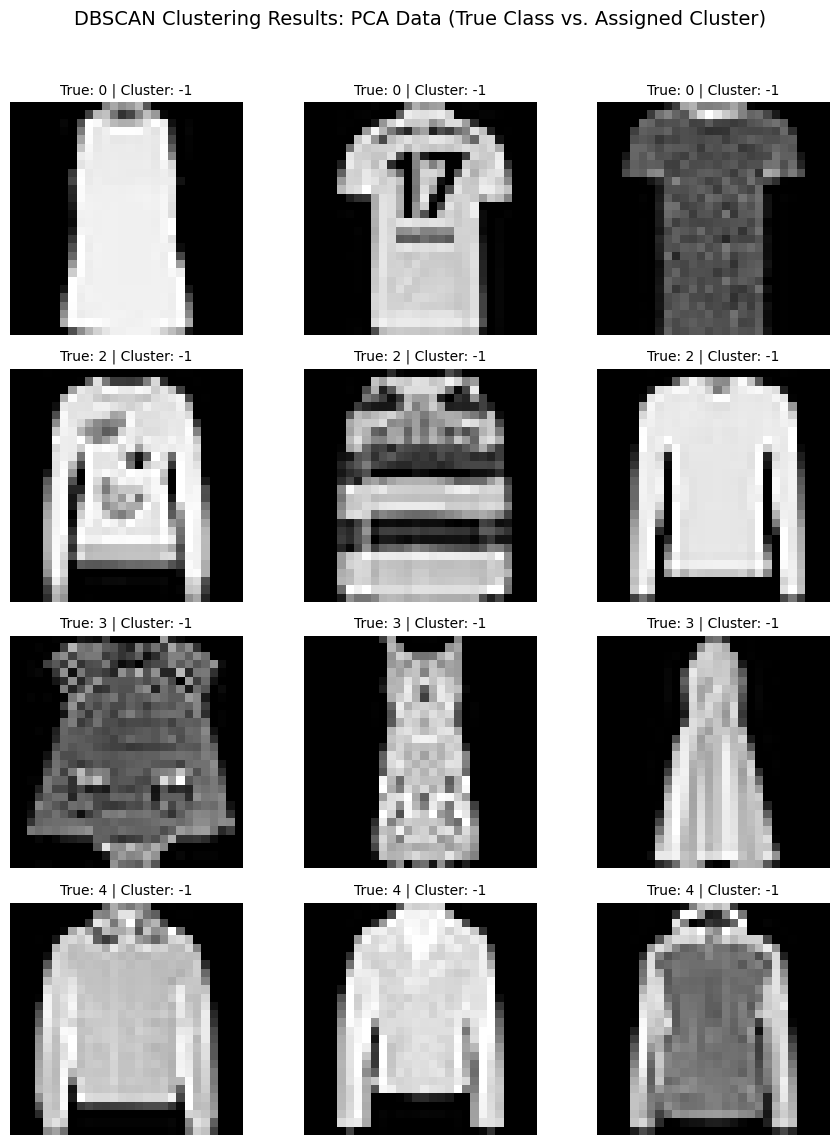

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# 1. Choose Classes
selected_classes = [0, 2, 3, 4]

# Prepare lists to store sampled data
sampled_images_to_plot_dbscan = []
sampled_true_labels_dbscan = []
sampled_raw_cluster_labels_dbscan = []
sampled_pca_cluster_labels_dbscan = []

# 2. Sample Selection: For each of the four selected_classes, randomly select three images.
for class_id in selected_classes:
    # Find indices of images belonging to the current class in y_test
    class_indices = np.where(y_test == class_id)[0]
    # Randomly select 3 indices from these
    np.random.seed(42) # For reproducibility
    chosen_indices = np.random.choice(class_indices, 3, replace=False)

    # Append selected data for plotting
    sampled_images_to_plot_dbscan.extend(x_test[chosen_indices])
    sampled_true_labels_dbscan.extend(y_test[chosen_indices])
    # Use the 'optimized' DBSCAN labels from the previous step
    sampled_raw_cluster_labels_dbscan.extend(raw_dbscan_labels_optimized[chosen_indices])
    sampled_pca_cluster_labels_dbscan.extend(pca_dbscan_labels_optimized[chosen_indices])

# Convert to numpy arrays for easier handling
sampled_images_to_plot_dbscan = np.array(sampled_images_to_plot_dbscan)
sampled_true_labels_dbscan = np.array(sampled_true_labels_dbscan)
sampled_raw_cluster_labels_dbscan = np.array(sampled_raw_cluster_labels_dbscan)
sampled_pca_cluster_labels_dbscan = np.array(sampled_pca_cluster_labels_dbscan)

# 3. Define Plotting Function (reusable for both raw and PCA DBSCAN results)
def plot_dbscan_comparison(images, true_labels, cluster_labels, title_prefix, filename):
    plt.figure(figsize=(9, 12))
    plt.suptitle(f'DBSCAN Clustering Results: {title_prefix} (True Class vs. Assigned Cluster)', fontsize=14)

    for i in range(len(images)):
        plt.subplot(len(selected_classes), 3, i + 1)
        plt.imshow(images[i], cmap='gray')
        plt.title(f"True: {true_labels[i]} | Cluster: {cluster_labels[i]}", fontsize=10)
        plt.axis('off')

    plt.tight_layout(rect=[0, 0.03, 1, 0.96]) # Adjust layout to prevent suptitle from overlapping
    plt.savefig(filename)
    plt.show()

# 4. Generate 2 Plots
# Plot 1: DBSCAN - Raw Data
plot_dbscan_comparison(
    sampled_images_to_plot_dbscan,
    sampled_true_labels_dbscan,
    sampled_raw_cluster_labels_dbscan,
    "Raw Data",
    "dbscan_raw_results.png"
)

# Plot 2: DBSCAN - PCA Data
plot_dbscan_comparison(
    sampled_images_to_plot_dbscan,
    sampled_true_labels_dbscan,
    sampled_pca_cluster_labels_dbscan,
    "PCA Data",
    "dbscan_pca_results.png"
)

ΕΡΩΤΗΜΑ 7 AGGLOMERATIVE CLUSTERING

In [ ]:
import time
import numpy as np
from sklearn.cluster import AgglomerativeClustering

# 1. Constants: Define the number of clusters as K=10
K_AC = 10

# 2. Model Initialization: Initialize AgglomerativeClustering model
# Use 'euclidean' metric and 'ward' linkage
ac_model = AgglomerativeClustering(n_clusters=K_AC, metric='euclidean', linkage='ward')

# 3. Experiment 1: Raw Data (Baseline - 784D)
# Time Execution and Clustering on x_test_flat
print(f"Applying Agglomerative Clustering to Raw Data (784D) with K={K_AC}...")
start_time_raw_ac = time.time()
raw_ac_labels = ac_model.fit_predict(x_test_flat)
end_time_raw_ac = time.time()
raw_ac_time = end_time_raw_ac - start_time_raw_ac

print(f"Agglomerative Clustering on Raw Data (784D) completed in {raw_ac_time:.4f} seconds.")
print(f"Shape of raw_ac_labels: {raw_ac_labels.shape}")

# 4. Experiment 2: PCA Data (Encoded - 84D)
# Time Execution and Clustering on x_test_pca
print(f"\nApplying Agglomerative Clustering to PCA Data (84D) with K={K_AC}...")
start_time_pca_ac = time.time()
pca_ac_labels = ac_model.fit_predict(x_test_pca)
end_time_pca_ac = time.time()
pca_ac_time = end_time_pca_ac - start_time_pca_ac

print(f"Agglomerative Clustering on PCA Data (84D) completed in {pca_ac_time:.4f} seconds.")
print(f"Shape of pca_ac_labels: {pca_ac_labels.shape}")

# Final Output confirmation (optional, but good for verification)
print(f"\nK_AC: {K_AC}")
print(f"Raw AC labels (first 5): {raw_ac_labels[:5]}")
print(f"PCA AC labels (first 5): {pca_ac_labels[:5]}")

Applying Agglomerative Clustering to Raw Data (784D) with K=10...
Agglomerative Clustering on Raw Data (784D) completed in 36.5881 seconds.
Shape of raw_ac_labels: (10000,)

Applying Agglomerative Clustering to PCA Data (84D) with K=10...
Agglomerative Clustering on PCA Data (84D) completed in 8.1817 seconds.
Shape of pca_ac_labels: (10000,)

K_AC: 10
Raw AC labels (first 5): [3 5 1 1 9]
PCA AC labels (first 5): [0 2 6 6 1]


ΕΡΩΤΗΜΑ 8 ΜΕΤΡΙΚΕΣ

In [ ]:
from sklearn.metrics import calinski_harabasz_score, davies_bouldin_score, silhouette_score, adjusted_rand_score

# --- Experiment 1: Raw Data Metrics (Agglomerative) ---
print("\n--- Agglomerative Clustering: Raw Data Metrics ---")
raw_ac_ch = calinski_harabasz_score(x_test_flat, raw_ac_labels)
print(f"Calinski-Harabasz Index (Raw AC): {raw_ac_ch:.4f}")

raw_ac_db = davies_bouldin_score(x_test_flat, raw_ac_labels)
print(f"Davies-Bouldin Index (Raw AC): {raw_ac_db:.4f}")

raw_ac_silhouette = silhouette_score(x_test_flat, raw_ac_labels)
print(f"Silhouette Score (Raw AC): {raw_ac_silhouette:.4f}")

raw_ac_ari = adjusted_rand_score(y_test, raw_ac_labels)
print(f"Adjusted Rand Index (Raw AC): {raw_ac_ari:.4f}")

# --- Experiment 2: PCA Data Metrics (Agglomerative) ---
print("\n--- Agglomerative Clustering: PCA Data Metrics ---")
pca_ac_ch = calinski_harabasz_score(x_test_pca, pca_ac_labels)
print(f"Calinski-Harabasz Index (PCA AC): {pca_ac_ch:.4f}")

pca_ac_db = davies_bouldin_score(x_test_pca, pca_ac_labels)
print(f"Davies-Bouldin Index (PCA AC): {pca_ac_db:.4f}")

pca_ac_silhouette = silhouette_score(x_test_pca, pca_ac_labels)
print(f"Silhouette Score (PCA AC): {pca_ac_silhouette:.4f}")

pca_ac_ari = adjusted_rand_score(y_test, pca_ac_labels)
print(f"Adjusted Rand Index (PCA AC): {pca_ac_ari:.4f}")



--- Agglomerative Clustering: Raw Data Metrics ---
Calinski-Harabasz Index (Raw AC): 1116.1278
Davies-Bouldin Index (Raw AC): 1.9335
Silhouette Score (Raw AC): 0.1168
Adjusted Rand Index (Raw AC): 0.3478

--- Agglomerative Clustering: PCA Data Metrics ---
Calinski-Harabasz Index (PCA AC): 1369.1223
Davies-Bouldin Index (PCA AC): 1.8536
Silhouette Score (PCA AC): 0.1458
Adjusted Rand Index (PCA AC): 0.3641


ΕΡΩΤΗΜΑ 9

In [ ]:
import pandas as pd

# 1. Append Row 5 (Raw Agglomerative)
raw_ac_row = {
    'DR Technique Name': "Raw",
    'Clustering Algorithm': "Agglomerative",
    'DR Training Time (s)': 0.0,
    'Clustering Time (s)': raw_ac_time,
    'Suggested Clusters (K)': K_AC,
    'Calinski-Harabasz': raw_ac_ch,
    'Davies-Bouldin': raw_ac_db,
    'Silhouette Score': raw_ac_silhouette,
    'ARI': raw_ac_ari
}
results_df = pd.concat([results_df, pd.DataFrame([raw_ac_row])], ignore_index=True)

# 2. Append Row 6 (PCA Agglomerative)
pca_ac_row = {
    'DR Technique Name': "PCA",
    'Clustering Algorithm': "Agglomerative",
    'DR Training Time (s)': training_time_pca,
    'Clustering Time (s)': pca_ac_time,
    'Suggested Clusters (K)': K_AC,
    'Calinski-Harabasz': pca_ac_ch,
    'Davies-Bouldin': pca_ac_db,
    'Silhouette Score': pca_ac_silhouette,
    'ARI': pca_ac_ari
}
results_df = pd.concat([results_df, pd.DataFrame([pca_ac_row])], ignore_index=True)

# 3. Final Output
pd.set_option('display.max_columns', None)
results_df

,DR Technique Name,Clustering Algorithm,DR Training Time (s),Clustering Time (s),Suggested Clusters (K),Calinski-Harabasz,Davies-Bouldin,Silhouette Score,ARI
0,Raw,MiniBatchKMeans,0.000000,0.283376,10,1174.938721,2.013128,0.119357,0.352897
1,PCA,MiniBatchKMeans,2.625973,0.035813,10,1495.810547,2.002745,0.150902,0.351028
2,Raw,DBSCAN,0.000000,7.420504,7,16.130520,1.440171,-0.096445,0.003374
3,PCA,DBSCAN,2.625973,0.822870,13,162.419250,0.926202,0.369793,0.402987
4,Raw,Agglomerative,0.000000,36.588092,10,1116.127808,1.933462,0.116826,0.347787
5,PCA,Agglomerative,2.625973,8.181657,10,1369.122314,1.853597,0.145832,0.364124


ΕΡΩΤΗΜΑ 10 ΟΠΤΙΚΟΠΟΙΗΣΗ

ΕΧΩ ΕΠΙΛΕΞΕΙ ΞΑΝΑ ΤΙΣ ΚΛΑΣΕΙΣ 0 2 3 4

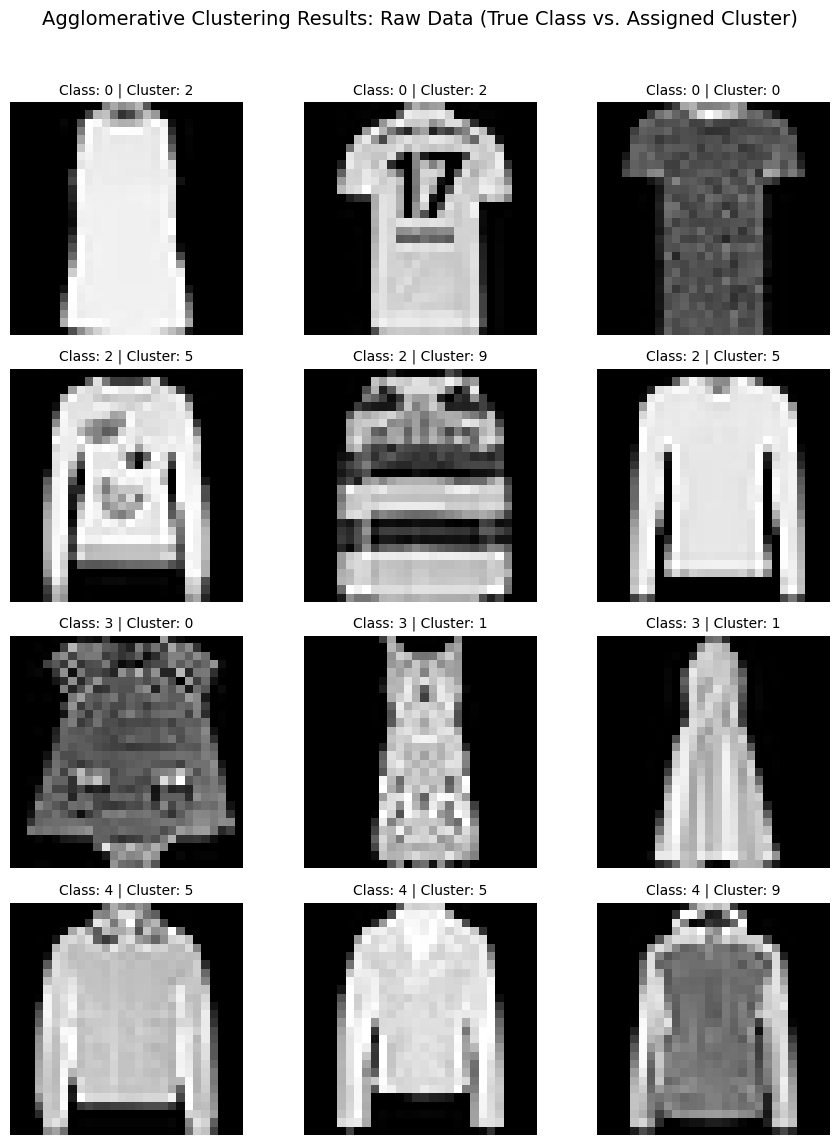

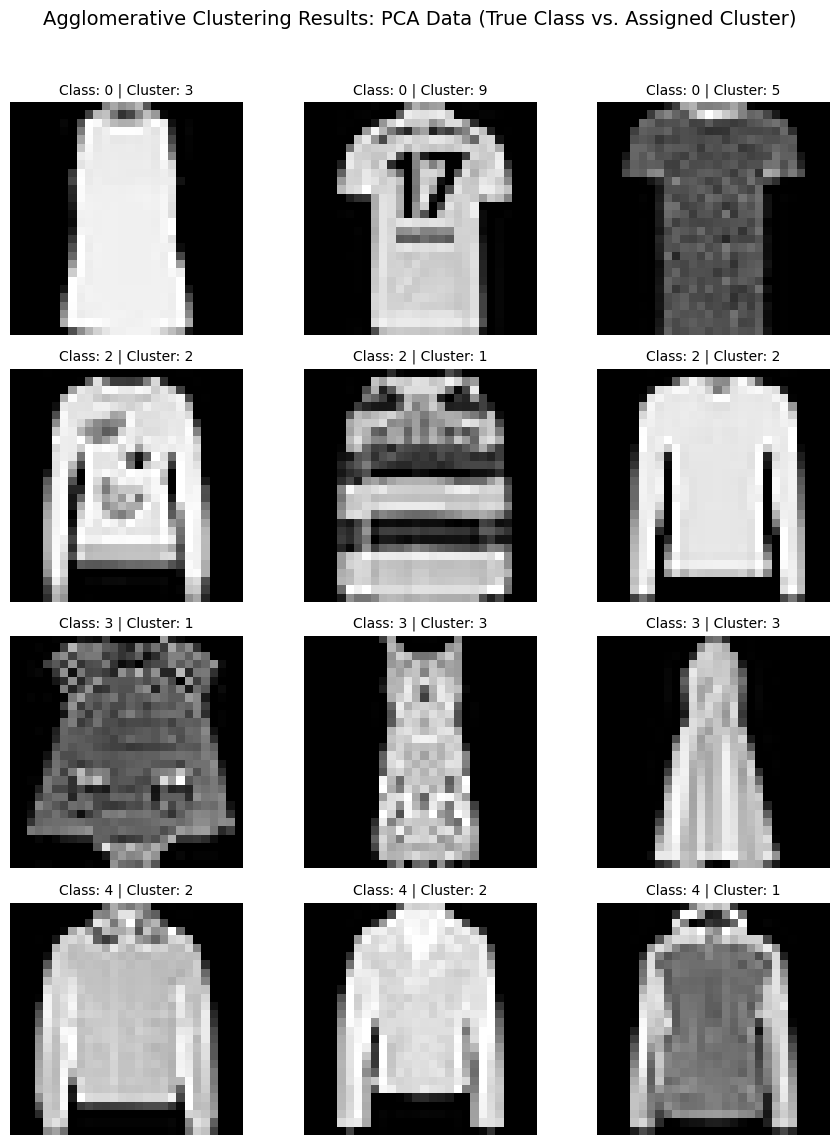

Agglomerative Clustering comparison plots generated and saved.


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# 1. Reuse selected_classes from previous visualization steps
selected_classes = [0, 2, 3, 4]

# Prepare lists to store sampled data for AC
sampled_raw_ac_labels = []
sampled_pca_ac_labels = []

# 2. Extract Agglomerative Clustering labels for these sampled images
# We need to re-generate the chosen_indices to ensure consistency with previous sampling
for class_id in selected_classes:
    class_indices = np.where(y_test == class_id)[0]
    np.random.seed(42) # Ensure reproducibility, same as previous sampling steps
    chosen_indices = np.random.choice(class_indices, 3, replace=False)

    sampled_raw_ac_labels.extend(raw_ac_labels[chosen_indices])
    sampled_pca_ac_labels.extend(pca_ac_labels[chosen_indices])

# Convert to numpy arrays for easier handling
sampled_raw_ac_labels = np.array(sampled_raw_ac_labels)
sampled_pca_ac_labels = np.array(sampled_pca_ac_labels)

# The sampled_images_to_plot and sampled_true_labels are already available from cell mf-8eQzmmtAt
# I will reuse the plot_dbscan_comparison function for plotting with minor modifications

def plot_ac_comparison(images, true_labels, cluster_labels, title_prefix, filename):
    plt.figure(figsize=(9, 12))
    plt.suptitle(f'Agglomerative Clustering Results: {title_prefix} (True Class vs. Assigned Cluster)', fontsize=14)

    for i in range(len(images)):
        plt.subplot(len(selected_classes), 3, i + 1)
        plt.imshow(images[i], cmap='gray')
        plt.title(f"Class: {true_labels[i]} | Cluster: {cluster_labels[i]}", fontsize=10)
        plt.axis('off')

    plt.tight_layout(rect=[0, 0.03, 1, 0.96]) # Adjust layout to prevent suptitle from overlapping
    plt.savefig(filename)
    plt.show()

# 3. Create a 4x3 grid plot for Agglomerative Clustering on Raw Data
plot_ac_comparison(
    sampled_images_to_plot,
    sampled_true_labels,
    sampled_raw_ac_labels,
    "Raw Data",
    "ac_raw_results.png"
)

# 4. Create a 4x3 grid plot for Agglomerative Clustering on PCA Data
plot_ac_comparison(
    sampled_images_to_plot,
    sampled_true_labels,
    sampled_pca_ac_labels,
    "PCA Data",
    "ac_pca_results.png"
)

print("Agglomerative Clustering comparison plots generated and saved.")